### Exercise 07
### The Boltzmann distribution

#### 8.1 Microstates in a 5-level system

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

1. Write a Python-script that generates a series of configurations according to this
scheme. In the initial state all particles should be in the second lowest energy level.

In [2]:
N = 6
c = np.ones(N)
seconds = 50
total_energy = list()

e0 = list()
e1 = list()
e2 = list()
e3 = list()
e4 = list()


for x in range(seconds):
    
    i = random.randint(0, c.size-1)
    j = random.randint(0, c.size-1)
    
    if i != j:
        if c[i]<4 and c[j]>0:
            c[i] += 1
            c[j] -= 1
    
    total_energy.append(np.sum(c))
    
    e0.append(c.size-np.count_nonzero(c))
    e1.append(np.count_nonzero(c == 1))
    e2.append(np.count_nonzero(c == 2))
    e3.append(np.count_nonzero(c == 3))
    e4.append(np.count_nonzero(c == 4))

2. Plot the total energy of the system as a function of time

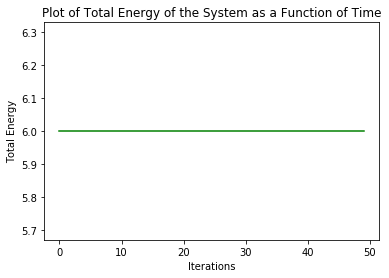

In [3]:
plt.plot(total_energy, color="g")
plt.xlabel("Iterations")
plt.ylabel("Total Energy")
plt.title("Plot of Total Energy of the System as a Function of Time")
plt.show()

3. Plot the population of the energy levels as function of time

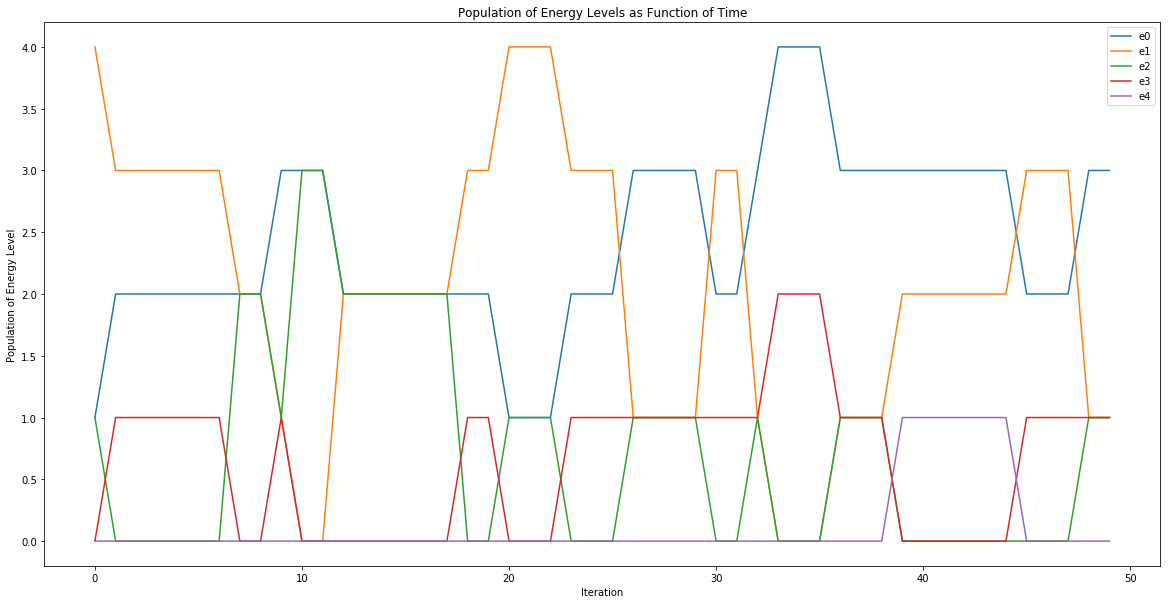

In [4]:
fig = plt.figure(figsize=(20, 10))
plt.plot(e0, label = 'e0')
plt.plot(e1,label = 'e1')
plt.plot(e2,label = 'e2')
plt.plot(e3,label = 'e3')
plt.plot(e4,label = 'e4')
plt.title('Population of Energy Levels as Function of Time')
plt.xlabel('Iteration')
plt.ylabel('Population of Energy Level')
plt.legend()

plt.show()

4. Calculate the average population of each energy level and the standard deviation
after the equilibration period and plot the results with errorbars.

In [5]:
average_e0 = sum(e0)/len(e0)
average_e1 = sum(e1)/len(e1)
average_e0 = sum(e2)/len(e2)
average_e1 = sum(e3)/len(e3)
average_e0 = sum(e4)/len(e4)